## Debugging examples

### Example 1

Expect plotted values to all be greater than 0.

<AxesSubplot:xlabel='Time'>

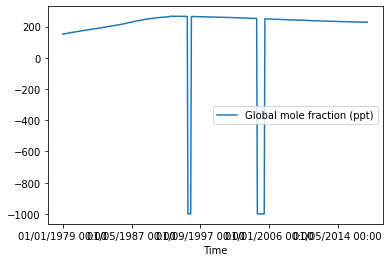

In [2]:
import pandas as pd
cfc_filename = "AGAGE_CFC-11_global_monthly-modified.csv"

# Calling read_csv to skip first 3 header rows and include "Time" as the index.
cfc_df = pd.read_csv(cfc_filename, skiprows=3, index_col = "Time")

cfc_df.plot.line(y = "Global mole fraction (ppt)")

 - What could you do to investigate this? What would you want to check?

---

### Example 2

Error message being returned when trying to create and use a function

In [3]:
def encode(message):
    """
    Encode a message from letters / numbers into morse code.
    """
    morse = []

    for letter in message:
        morse_letter = letter_to_morse[letter]
        morse.append(morse_letter)

    morse_message = " ".join(morse)
    
    return morse_message

In [4]:
letter_to_morse = {'a':'.-', 'b':'-...', 'c':'-.-.', 'd':'-..', 'e':'.', 'f':'..-.', 
                   'g':'--.', 'h':'....', 'i':'..', 'j':'.---', 'k':'-.-', 'l':'.-..', 'm':'--', 
                   'n':'-.', 'o':'---', 'p':'.--.', 'q':'--.-', 'r':'.-.', 's':'...', 't':'-',
                   'u':'..-', 'v':'...-', 'w':'.--', 'x':'-..-', 'y':'-.--', 'z':'--..',
                   '0':'-----', '1':'.----', '2':'..---', '3':'...--', '4':'....-',
                   '5':'.....', '6':'-....', '7':'--...', '8':'---..', '9':'----.',
                   ' ':'/'}

message = "SOS We have hit an iceberg and need help quickly"
morse_message = encode(message)

print(f"Incoming message: {message}")
print(f"   Morse encoded: {morse_message}")

KeyError: 'S'

 - What could be creating the error? What could you do to investigate this?

---

## Example 3

In [2]:
import pandas as pd
genres_df = pd.read_csv("genres_v2.csv")

/tmp/ipykernel_530995/3802096507.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  genres_df = pd.read_csv("genres_v2.csv")


In [3]:
genres_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [30]:
from sklearn.decomposition import PCA

labels = genres_df["genre"].values

feature_names = ["danceability", "energy", "loudness", "speechiness",
                 "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
features = genres_df[feature_names].values

visualise_features = PCA(n_components=2).fit_transform(features)

In [31]:
# Want to plot the features and colour by genre
import plotly.express as px

assert len(labels) == len(visualise_features)

fig = px.scatter(x=visualise_features[0], y=visualise_features[1], color=labels)
fig.show()

ValueError: All arguments should have the same length. The length of argument `color` is 42305, whereas the length of  previously-processed arguments ['x', 'y'] is 2